# Introduction
This notebook serves as a comprehensive learning module that combines hands-on coding, conceptual insights, and structured student tasks. The flow mirrors a real deep learning workflow—from loading data and building models to understanding optimization, regularization, and model behavior.

The notebook is organized into **three major sections**, each designed to progressively deepen the learner's understanding of neural networks and training dynamics.


## Section 1 — Practical Part #1: Building & Training a Neural Network

### **What this section covers:**
- Loading and preprocessing the MNIST dataset
- Flattening image data for fully connected networks
- Building a neural network with:
  - Input layer (Flatten)
  - Hidden Dense layer (ReLU activation)
  - Output layer (Softmax activation)
- Compiling the model using the **Adam optimizer**
- Training the model and monitoring training/validation loss
- Predicting and visualizing test samples

### **Learning Outcome:**
Students gain a practical understanding of how forward and backward passes operate within a simple neural network.

[mnist dataset Link](https://datasets.activeloop.ai/docs/ml/datasets/mnist/)
---


In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train ,  x_test = x_train / 255.0 , x_test/255.0

In [5]:
len(x_train)

60000

In [6]:
x_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

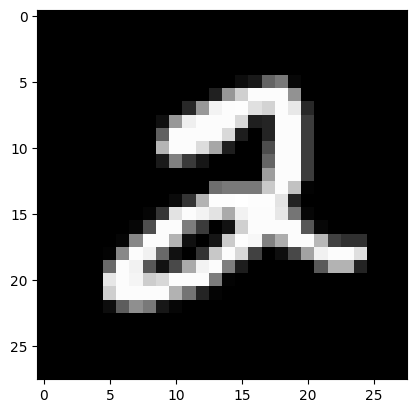

In [7]:
plt.imshow(x_train[5], cmap = "gray")

In [8]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)), # input layer > 2D to 1D
  # 64 128 256
  keras.layers.Dense(128, activation="relu"), # hidden layer 1

  keras.layers.Dense(10, activation= "softmax" ) # output layer
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# adam Adaptive Moment Estimation (RMSporb+ Momenmtum) > Optimizer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train test

train validation test

In [10]:
history = model.fit(x_train,y_train ,epochs = 20 ,validation_data=(x_test, y_test) ) # train ,  test

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8736 - loss: 0.4416 - val_accuracy: 0.9605 - val_loss: 0.1355
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9643 - loss: 0.1211 - val_accuracy: 0.9725 - val_loss: 0.0933
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9767 - loss: 0.0775 - val_accuracy: 0.9735 - val_loss: 0.0866
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9833 - loss: 0.0563 - val_accuracy: 0.9768 - val_loss: 0.0766
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9861 - loss: 0.0435 - val_accuracy: 0.9766 - val_loss: 0.0792
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9887 - loss: 0.0354 - val_accuracy: 0.9790 - val_loss: 0.0685
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9918 - loss: 0.0274 - val_accuracy: 0.9770 - val_loss: 0.0832
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9929 - loss: 0.0234 -

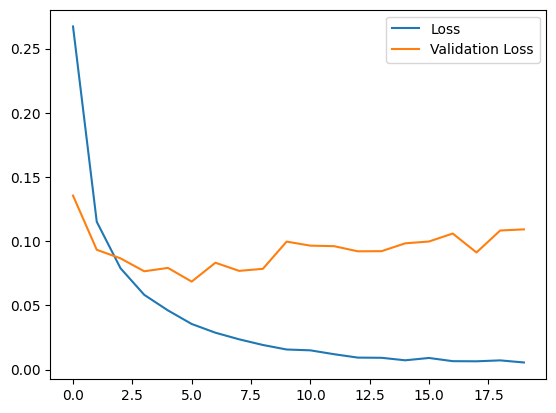

In [11]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

## Apply Task 1

In [12]:
prediction = model.predict(x_test[15].reshape(1, 28, 28))  # 10 pred
#sample 1 ==> 1
#sample 2 ==> 5
#sample 3 ==> 15
print("Prediction:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Prediction: 5


In [13]:
prediction

array([[2.7584312e-18, 9.3755450e-17, 3.8272363e-17, 3.1002132e-09,
        3.1498565e-17, 1.0000000e+00, 3.2021419e-12, 2.4105529e-15,
        3.8260636e-12, 2.2647616e-17]], dtype=float32)

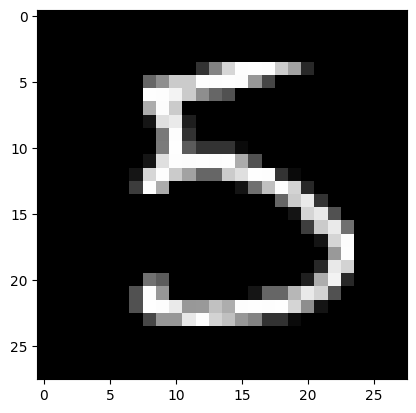

In [14]:
plt.imshow(x_test[15], cmap = "gray")

## Another way to try 3 samples

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Sample 1
Predicted Label: 2
True Label: 2


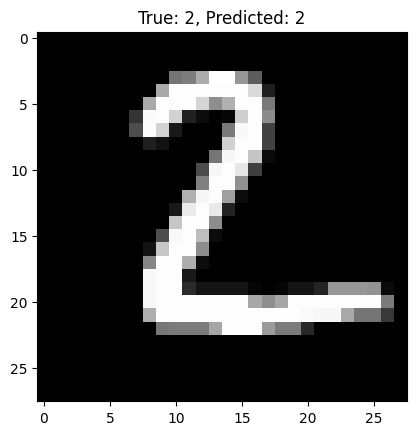

------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Sample 5
Predicted Label: 1
True Label: 1


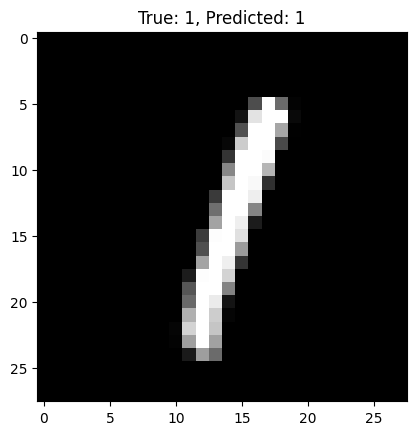

------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Sample 15
Predicted Label: 5
True Label: 5


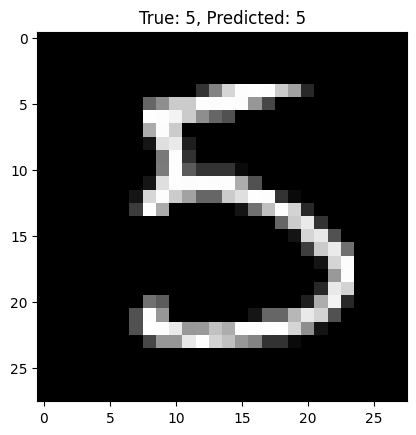

------------------------------


In [15]:
import numpy as np
import matplotlib.pyplot as plt

indices = [1, 5, 15]   # 3 different samples

for i in indices:
    prediction = model.predict(x_test[i].reshape(1, 28, 28))
    predicted_label = np.argmax(prediction)
    true_label = y_test[i]

    print(f"Sample {i}")
    print("Predicted Label:", predicted_label)
    print("True Label:", true_label)
    plt.imshow(x_test[i], cmap = "gray")
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.show()
    print("-" * 30)

## Apply task 2

In [16]:
#upload image
from google.colab import files
uploaded = files.upload()


Saving handwritten.png to handwritten.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Label: 2


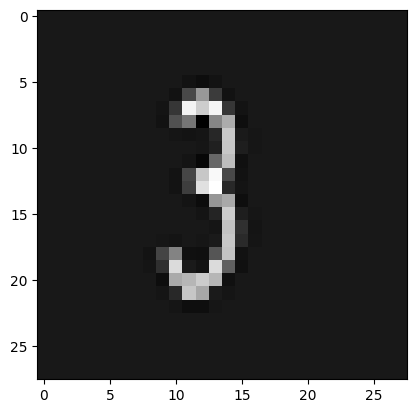

In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open("handwritten.png")
img_gray = img.convert("L")
img_resized = img_gray.resize((28, 28))

img_array = np.array(img_resized) / 255.0
img_input = img_array.reshape(1, 28, 28)

prediction = model.predict(img_input)

print("Predicted Label:", np.argmax(prediction))

plt.imshow(img_array, cmap="gray")


##   Did the model correctly classify the digit?  
*  no the handwritten is 3  but , the model predicted 2


---


##  Why did the model fail?


*  The handwritten image does not perfectly match the distribution of the training data
*   LThe model was trained on clean, standardized MNIST digits, so even small differece can confuse it.


---

## Noise and Preprocessing Effects


*   Although the image was:

    1.   Converted to grayscale
    2.   Resized to 28*28
    3.   Normalized to [0,1]

*  There is still:

    1.   Blurring from resizing
    2.   Loss of fine details
    3.   Pixel-level noise

















## Section 2 — Practical Part #2: Data Splitting, Regularization & Early Stopping

### **Key Concepts Introduced:**
#### **1. Proper Dataset Splitting**
**General Idea**

- **Training set**: The model learns from this data.  
- **Validation set**: Used during training to tune hyperparameters and prevent overfitting.  
- **Test set**: Kept aside until the very end to measure the model’s *true performance* on completely unseen data.  

**Important Note**:  
If you use `x_test` directly as your validation set, this is a mistake.  
Why? Because you will end up tuning your model on the same data that you later claim to be your “unseen test set,” which makes the final evaluation biased.  

The correct workflow:
1. Split the dataset into **train + test** (e.g., 80% train, 20% test).  
2. From the **train** portion, further split into **train + validation** (e.g., 70% train, 10% validation, 20% test).  
3. Use the **validation set** only for model tuning.  
4. Use the **test set** once at the end for the final unbiased performance check.

#### **2. Regularization Techniques**
- Adding **Dropout** layers to reduce overfitting
- Using **EarlyStopping** to detect convergence and stop training

#### **3. Improved Model Pipeline**
- Training over more epochs
- Monitoring training vs. validation performance
- Evaluating on the final test set
- Predicting and analyzing results

### **Learning Outcome:**
Students understand how model generalization is improved using splitting, dropout, and early stopping.

---


In [18]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 1) Load Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values (0-255 -> 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 2) Split Validation Set from Training Set
# Reserve last 5000 samples for validation
x_val = x_train[-5000:]
y_val = y_train[-5000:]

x_tr = x_train[:-5000]
y_tr = y_train[:-5000]
print("Train shape:", x_tr.shape)
print("Validation shape:", x_val.shape)
print("Test shape:", x_test.shape)

Train shape: (55000, 28, 28)
Validation shape: (5000, 28, 28)
Test shape: (10000, 28, 28)


## Apply Task 3

In [22]:
# 5 Epochs
# 3) Build Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
)



Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8647 - loss: 0.4747 - val_accuracy: 0.9664 - val_loss: 0.1219
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9566 - loss: 0.1465 - val_accuracy: 0.9734 - val_loss: 0.1009
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9714 - loss: 0.0975 - val_accuracy: 0.9764 - val_loss: 0.0800
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9764 - loss: 0.0750 - val_accuracy: 0.9790 - val_loss: 0.0763
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9818 - loss: 0.0568 - val_accuracy: 0.9788 - val_loss: 0.0789


In [23]:
# 10 Epochs
# 3) Build Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
)



Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8610 - loss: 0.4812 - val_accuracy: 0.9706 - val_loss: 0.1087
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9554 - loss: 0.1438 - val_accuracy: 0.9728 - val_loss: 0.0928
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9705 - loss: 0.0986 - val_accuracy: 0.9786 - val_loss: 0.0798
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9773 - loss: 0.0735 - val_accuracy: 0.9776 - val_loss: 0.0718
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9811 - loss: 0.0592 - val_accuracy: 0.9782 - val_loss: 0.0762
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9847 - loss: 0.0493 - val_accuracy: 0.9808 - val_loss: 0.0690
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9855 - loss: 0.0427 - val_accuracy: 0.9810 - val_loss: 0.0688
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9889 - loss: 0.0345 -

In [24]:
# 20 Epochs
# 3) Build Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


history = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
)



Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8647 - loss: 0.4781 - val_accuracy: 0.9700 - val_loss: 0.1209
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9560 - loss: 0.1481 - val_accuracy: 0.9736 - val_loss: 0.0966
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9696 - loss: 0.1000 - val_accuracy: 0.9768 - val_loss: 0.0850
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9777 - loss: 0.0742 - val_accuracy: 0.9790 - val_loss: 0.0822
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9813 - loss: 0.0601 - val_accuracy: 0.9810 - val_loss: 0.0704
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9834 - loss: 0.0521 - val_accuracy: 0.9814 - val_loss: 0.0728
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9860 - loss: 0.0441 - val_accuracy: 0.9802 - val_loss: 0.0715
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9864 - loss: 0.0399 - 

## Apply Task 4

In [30]:
# With Early stop
# 3) Build Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [31]:

# 5) Train with Validation Set
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True) # patience = 3
]

history = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8553 - loss: 0.4953 - val_accuracy: 0.9664 - val_loss: 0.1250
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9567 - loss: 0.1485 - val_accuracy: 0.9730 - val_loss: 0.0988
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9698 - loss: 0.1024 - val_accuracy: 0.9760 - val_loss: 0.0855
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9759 - loss: 0.0795 - val_accuracy: 0.9772 - val_loss: 0.0814
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9798 - loss: 0.0638 - val_accuracy: 0.9782 - val_loss: 0.0788
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9845 - loss: 0.0490 - val_accuracy: 0.9792 - val_loss: 0.0746
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9866 - loss: 0.0412 - val_accuracy: 0.9798 - val_loss: 0.0727
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9884 - loss: 0.0349 - 

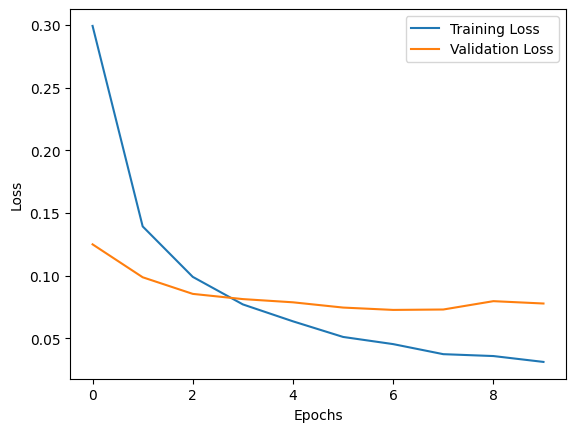

In [32]:
# 6) Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:

# 5) Train with Validation Set
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True) # patience = 5
]

history = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9877 - loss: 0.0383 - val_accuracy: 0.9812 - val_loss: 0.0700
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9894 - loss: 0.0326 - val_accuracy: 0.9814 - val_loss: 0.0754
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9911 - loss: 0.0273 - val_accuracy: 0.9806 - val_loss: 0.0735
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9925 - loss: 0.0246 - val_accuracy: 0.9800 - val_loss: 0.0765
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9907 - loss: 0.0282 - val_accuracy: 0.9816 - val_loss: 0.0773
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9929 - loss: 0.0206 - val_accuracy: 0.9802 - val_loss: 0.0760


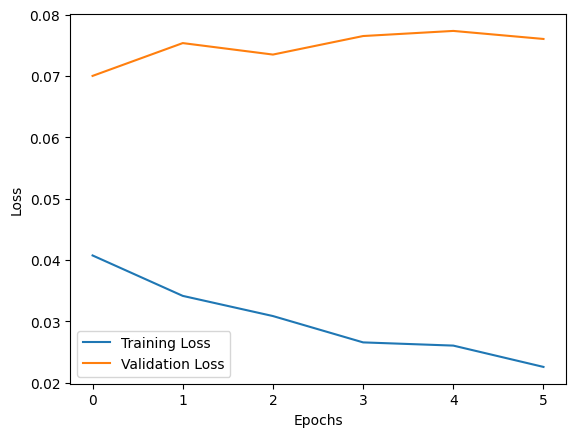

In [34]:

# 6) Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


SGD

In [35]:
# With Early stop
# 3) Build Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="SGD",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
# 5) Train with Validation Set
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)



Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7005 - loss: 1.0894 - val_accuracy: 0.9224 - val_loss: 0.3078
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8880 - loss: 0.3974 - val_accuracy: 0.9364 - val_loss: 0.2454
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9065 - loss: 0.3262 - val_accuracy: 0.9410 - val_loss: 0.2149
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9172 - loss: 0.2915 - val_accuracy: 0.9472 - val_loss: 0.1939
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9246 - loss: 0.2601 - val_accuracy: 0.9520 - val_loss: 0.1777
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9317 - loss: 0.2392 - val_accuracy: 0.9564 - val_loss: 0.1656
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9367 - loss: 0.2212 - val_accuracy: 0.9596 - val_loss: 0.1550
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9437 - loss: 0.2029 - 

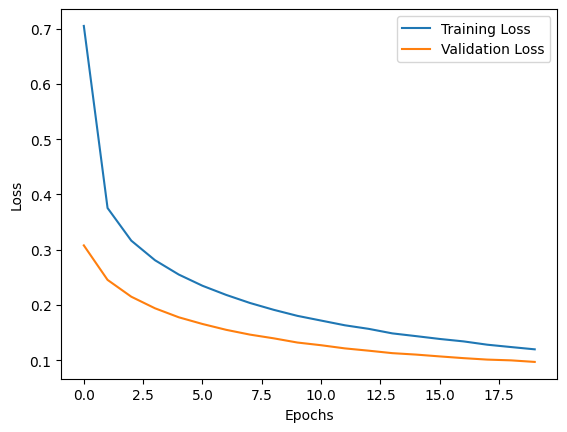

In [36]:
# 6) Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Apply Task5

In [37]:
#NO Dropout
# 3) Build Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 5) Train with Validation Set
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)



Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8696 - loss: 0.4568 - val_accuracy: 0.9630 - val_loss: 0.1279
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9593 - loss: 0.1358 - val_accuracy: 0.9746 - val_loss: 0.0897
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9735 - loss: 0.0877 - val_accuracy: 0.9784 - val_loss: 0.0830
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9814 - loss: 0.0635 - val_accuracy: 0.9806 - val_loss: 0.0732
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9851 - loss: 0.0483 - val_accuracy: 0.9758 - val_loss: 0.0793
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9887 - loss: 0.0377 - val_accuracy: 0.9772 - val_loss: 0.0811
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9924 - loss: 0.0268 - val_accuracy: 0.9806 - val_loss: 0.0793


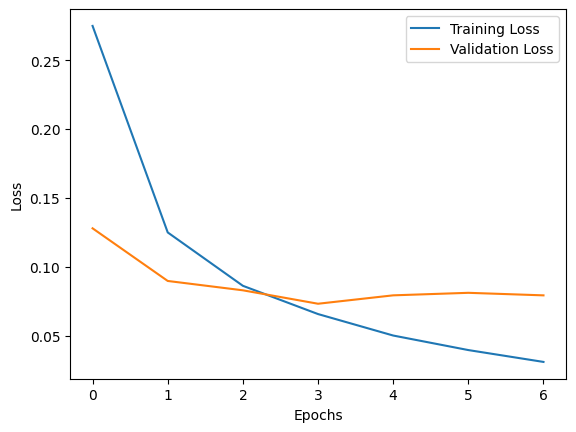

In [38]:
# 6) Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
# Dropout 0.1
# 3) Build Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 5) Train with Validation Set
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)



Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8612 - loss: 0.4753 - val_accuracy: 0.9662 - val_loss: 0.1207
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9585 - loss: 0.1414 - val_accuracy: 0.9726 - val_loss: 0.0967
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9713 - loss: 0.0949 - val_accuracy: 0.9746 - val_loss: 0.0823
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9786 - loss: 0.0701 - val_accuracy: 0.9786 - val_loss: 0.0823
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9830 - loss: 0.0566 - val_accuracy: 0.9772 - val_loss: 0.0712
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9841 - loss: 0.0494 - val_accuracy: 0.9812 - val_loss: 0.0691
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9876 - loss: 0.0389 - val_accuracy: 0.9804 - val_loss: 0.0845
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9888 - loss: 0.0352 - 

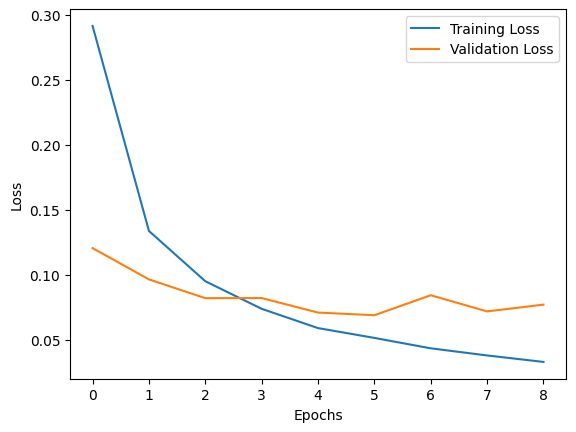

In [40]:
# 6) Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
# Dropout 0.3
# 3) Build Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 5) Train with Validation Set
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)



Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8414 - loss: 0.5350 - val_accuracy: 0.9656 - val_loss: 0.1397
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9471 - loss: 0.1783 - val_accuracy: 0.9744 - val_loss: 0.0930
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9597 - loss: 0.1339 - val_accuracy: 0.9766 - val_loss: 0.0828
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9658 - loss: 0.1127 - val_accuracy: 0.9800 - val_loss: 0.0749
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9711 - loss: 0.0931 - val_accuracy: 0.9802 - val_loss: 0.0731
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9728 - loss: 0.0857 - val_accuracy: 0.9788 - val_loss: 0.0732
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9773 - loss: 0.0737 - val_accuracy: 0.9786 - val_loss: 0.0737
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9775 - loss: 0.0699 - 

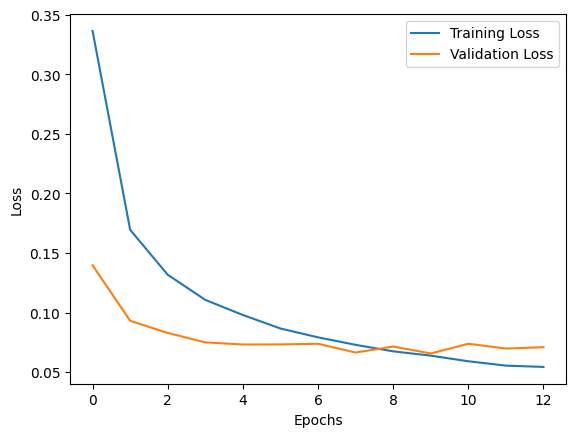

In [42]:
# 6) Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Apply Task 6

In [43]:

# 3) Build Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128,
                       activation="relu",
                       kernel_regularizer=keras.regularizers.l2(0.0001)
                       #0,01
                       #0.001
                       #0.0001
),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 5) Train with Validation Set
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)



Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8569 - loss: 0.5085 - val_accuracy: 0.9692 - val_loss: 0.1444
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9578 - loss: 0.1742 - val_accuracy: 0.9746 - val_loss: 0.1238
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9689 - loss: 0.1362 - val_accuracy: 0.9750 - val_loss: 0.1211
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9739 - loss: 0.1193 - val_accuracy: 0.9768 - val_loss: 0.1166
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9772 - loss: 0.1069 - val_accuracy: 0.9768 - val_loss: 0.1115
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9784 - loss: 0.1058 - val_accuracy: 0.9802 - val_loss: 0.1072
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9815 - loss: 0.0974 - val_accuracy: 0.9804 - val_loss: 0.1076
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9837 - loss: 0.0917 - 

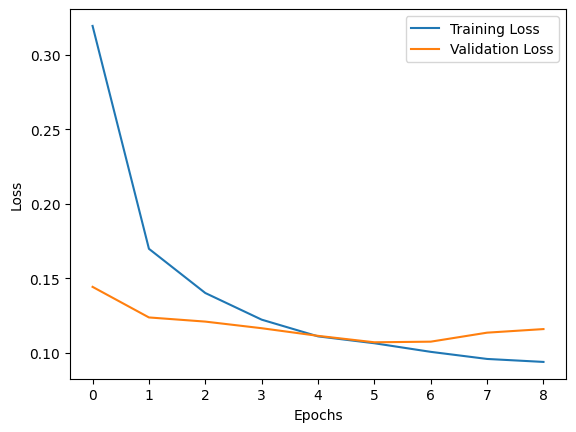

In [44]:
# 6) Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Apply task 7

In [45]:
def build_model(optimizer):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model


In [46]:
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)


In [47]:
sgd = keras.optimizers.SGD(learning_rate=0.01)
sgd_momentum = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
adam = keras.optimizers.Adam()
adamw = keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4)


In [48]:
import matplotlib.pyplot as plt

def plot_loss(history, title):
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()


In [49]:
def plot_accuracy(history, title):
    plt.figure()
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()


In [50]:
history_sgd = build_model(sgd).fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
    epochs=20, verbose=1
)



Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7390 - loss: 0.9982 - val_accuracy: 0.9250 - val_loss: 0.2943
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9028 - loss: 0.3530 - val_accuracy: 0.9368 - val_loss: 0.2336
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9169 - loss: 0.2956 - val_accuracy: 0.9442 - val_loss: 0.2057
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9275 - loss: 0.2574 - val_accuracy: 0.9490 - val_loss: 0.1847
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9337 - loss: 0.2357 - val_accuracy: 0.9540 - val_loss: 0.1692
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9399 - loss: 0.2137 - val_accuracy: 0.9584 - val_loss: 0.1560
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9441 - loss: 0.1999 - val_accuracy: 0.9644 - val_loss: 0.1449
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9481 - loss: 0.1835 - 

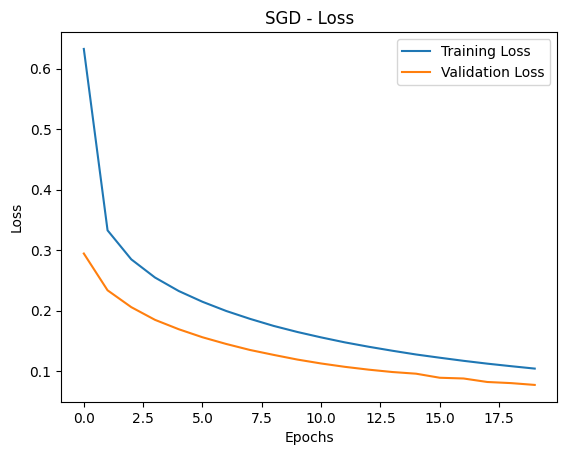

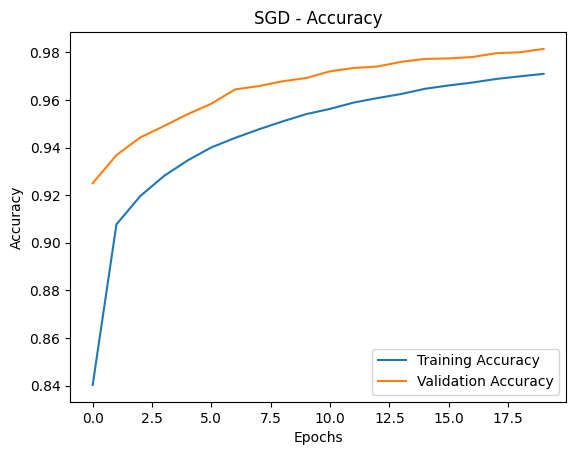

In [51]:
plot_loss(history_sgd, "SGD - Loss")
plot_accuracy(history_sgd, "SGD - Accuracy")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Predicted Label: 0
True Label: 0


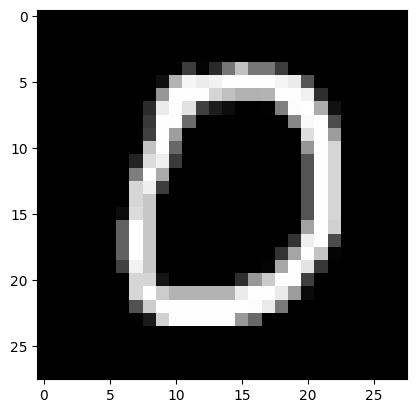

In [52]:
# Optimizer test
sample = x_test[10].reshape(1, 28, 28)
pred = history_sgd.model.predict(sample)
print("Predicted Label:", np.argmax(pred))
print("True Label:", y_test[10])
plt.imshow(x_test[10], cmap="gray")
plt.show()

In [53]:
history_sgd_m = build_model(sgd_momentum).fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
    epochs=20, verbose=1
)




Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8567 - loss: 0.4976 - val_accuracy: 0.9636 - val_loss: 0.1322
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9522 - loss: 0.1641 - val_accuracy: 0.9712 - val_loss: 0.0964
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9673 - loss: 0.1103 - val_accuracy: 0.9808 - val_loss: 0.0720
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9750 - loss: 0.0861 - val_accuracy: 0.9848 - val_loss: 0.0535
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9797 - loss: 0.0694 - val_accuracy: 0.9872 - val_loss: 0.0457
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9840 - loss: 0.0559 - val_accuracy: 0.9870 - val_loss: 0.0472
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9863 - loss: 0.0478 - val_accuracy: 0.9934 - val_loss: 0.0329
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9888 - loss: 0.0406 -

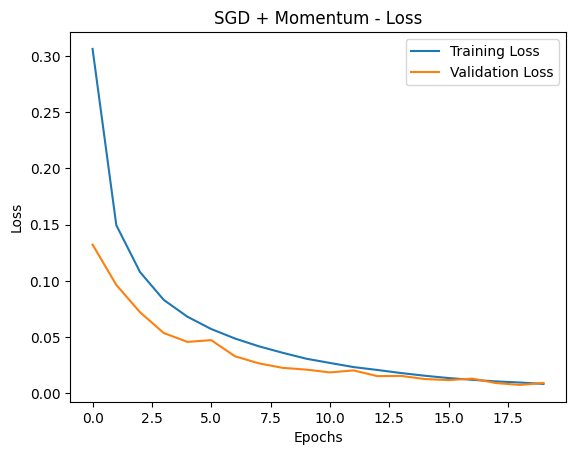

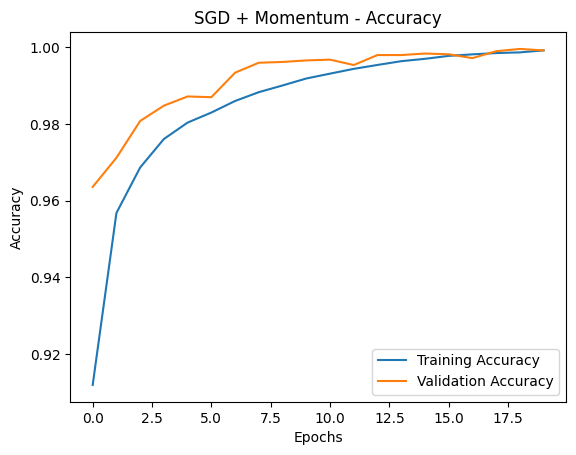

In [54]:
plot_loss(history_sgd_m, "SGD + Momentum - Loss")
plot_accuracy(history_sgd_m, "SGD + Momentum - Accuracy")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted Label: 6
True Label: 6


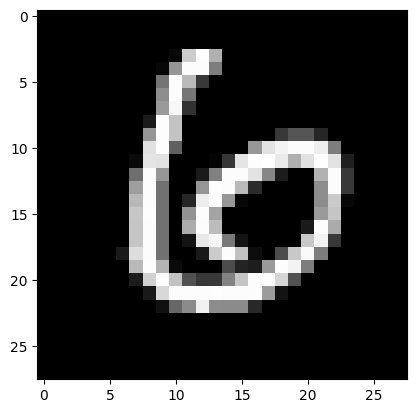

In [55]:
# Optimizer test
sample = x_test[11].reshape(1, 28, 28)
pred = history_sgd_m.model.predict(sample)
print("Predicted Label:", np.argmax(pred))
print("True Label:", y_test[11])
plt.imshow(x_test[11], cmap="gray")
plt.show()

In [56]:
history_adam = build_model(adam).fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
    epochs=20, verbose=1
)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8783 - loss: 0.4318 - val_accuracy: 0.9682 - val_loss: 0.1106
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9639 - loss: 0.1217 - val_accuracy: 0.9824 - val_loss: 0.0614
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9757 - loss: 0.0800 - val_accuracy: 0.9862 - val_loss: 0.0462
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9829 - loss: 0.0573 - val_accuracy: 0.9902 - val_loss: 0.0361
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9861 - loss: 0.0442 - val_accuracy: 0.9910 - val_loss: 0.0311
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9887 - loss: 0.0362 - val_accuracy: 0.9934 - val_loss: 0.0259
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9919 - loss: 0.0272 - val_accuracy: 0.9942 - val_loss: 0.0189
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9932 - loss: 0.0222 -

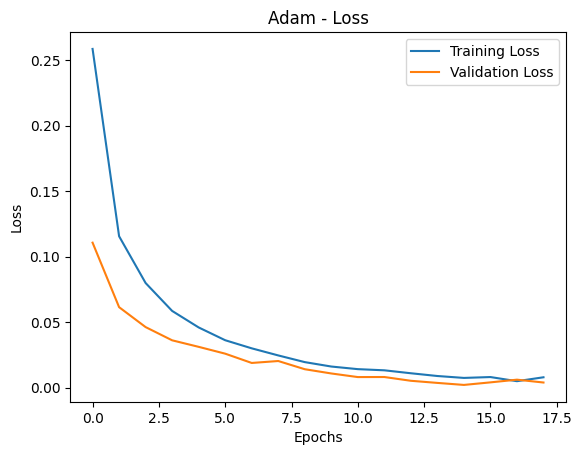

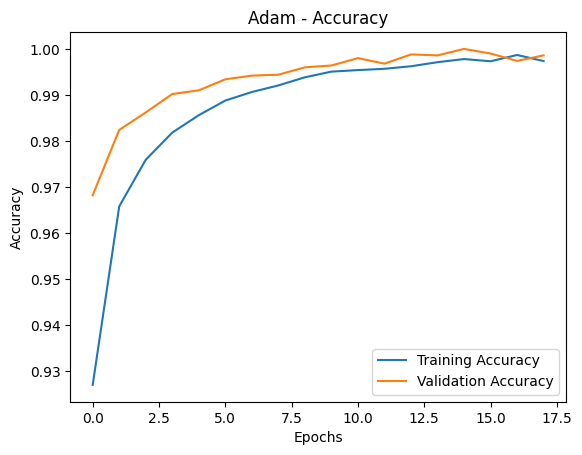

In [57]:
plot_loss(history_adam, "Adam - Loss")
plot_accuracy(history_adam, "Adam - Accuracy")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted Label: 9
True Label: 9


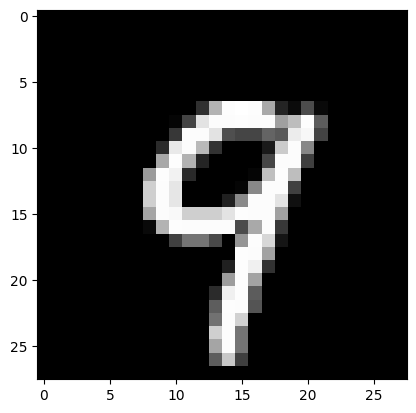

In [58]:
# Optimizer test
sample = x_test[12].reshape(1, 28, 28)
pred = history_adam.model.predict(sample)
print("Predicted Label:", np.argmax(pred))
print("True Label:", y_test[12])
plt.imshow(x_test[12], cmap="gray")
plt.show()

In [59]:

history_adamw = build_model(adamw).fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
    epochs=20, verbose=1
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8786 - loss: 0.4333 - val_accuracy: 0.9718 - val_loss: 0.0985
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9638 - loss: 0.1220 - val_accuracy: 0.9820 - val_loss: 0.0673
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9784 - loss: 0.0751 - val_accuracy: 0.9874 - val_loss: 0.0455
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9833 - loss: 0.0555 - val_accuracy: 0.9886 - val_loss: 0.0416
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9867 - loss: 0.0410 - val_accuracy: 0.9900 - val_loss: 0.0333
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9900 - loss: 0.0325 - val_accuracy: 0.9922 - val_loss: 0.0257
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9927 - loss: 0.0249 - val_accuracy: 0.9906 - val_loss: 0.0323
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9925 - loss: 0.0244 -

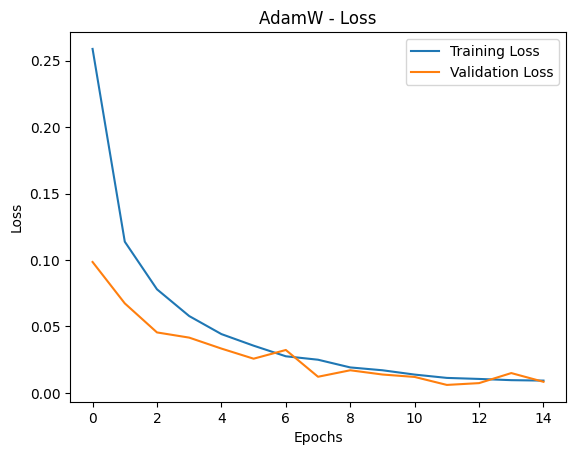

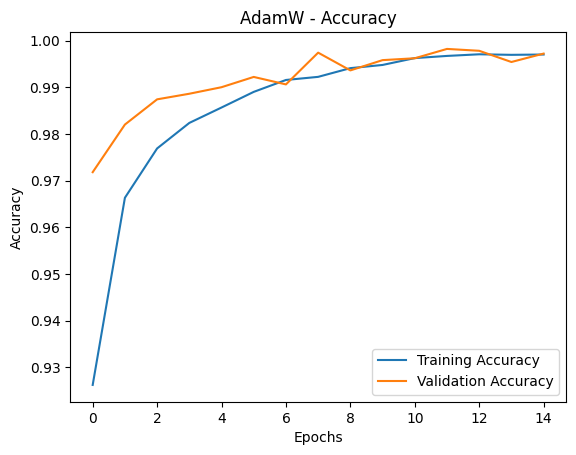

In [60]:
plot_loss(history_adamw, "AdamW - Loss")
plot_accuracy(history_adamw, "AdamW - Accuracy")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted Label: 5
True Label: 5


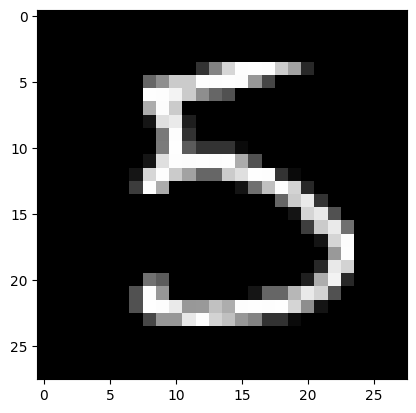

In [61]:
# Optimizer test
sample = x_test[15].reshape(1, 28, 28)
pred = history_adamw.model.predict(sample)
print("Predicted Label:", np.argmax(pred))
print("True Label:", y_test[15])
plt.imshow(x_test[15], cmap="gray")
plt.show()

## Apply Task 8

In [62]:

# 3) Build Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128,
                       activation="relu",

),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 5) Train with Validation Set
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]



In [63]:
#Batch Size > 8
history = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=8,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.8837 - loss: 0.3897 - val_accuracy: 0.9674 - val_loss: 0.1217
Epoch 2/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9623 - loss: 0.1219 - val_accuracy: 0.9776 - val_loss: 0.0820
Epoch 3/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9741 - loss: 0.0829 - val_accuracy: 0.9792 - val_loss: 0.0834
Epoch 4/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9789 - loss: 0.0649 - val_accuracy: 0.9792 - val_loss: 0.0781
Epoch 5/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9819 - loss: 0.0545 - val_accuracy: 0.9768 - val_loss: 0.0862
Epoch 6/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9852 - loss: 0.0471 - val_accuracy: 0.9778 - val_loss: 0.0963
Epoch 7/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9860 - loss: 0.0433 - val_accuracy: 0.9810 - val_loss: 0.0845


In [64]:
#Batch Size > 32
history = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9877 - loss: 0.0399 - val_accuracy: 0.9818 - val_loss: 0.0690
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9896 - loss: 0.0315 - val_accuracy: 0.9820 - val_loss: 0.0712
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9896 - loss: 0.0312 - val_accuracy: 0.9820 - val_loss: 0.0728
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9911 - loss: 0.0272 - val_accuracy: 0.9842 - val_loss: 0.0680
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9929 - loss: 0.0230 - val_accuracy: 0.9812 - val_loss: 0.0789
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9935 - loss: 0.0212 - val_accuracy: 0.9822 - val_loss: 0.0799
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9944 - loss: 0.0168 - val_accuracy: 0.9826 - val_loss: 0.0798


In [65]:
#Batch Size > 128
history = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9947 - loss: 0.0182 - val_accuracy: 0.9846 - val_loss: 0.0657
Epoch 2/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9956 - loss: 0.0141 - val_accuracy: 0.9846 - val_loss: 0.0677
Epoch 3/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9966 - loss: 0.0128 - val_accuracy: 0.9856 - val_loss: 0.0691
Epoch 4/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9965 - loss: 0.0122 - val_accuracy: 0.9832 - val_loss: 0.0710


## Apply Task 9

In [66]:
def build_model(activation):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=activation),
        keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model


In [67]:
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)


In [68]:
# For Relu
model_relu = build_model("relu")
history_relu = model_relu.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
    epochs=20,
    verbose=1
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8788 - loss: 0.4300 - val_accuracy: 0.9714 - val_loss: 0.1018
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9649 - loss: 0.1168 - val_accuracy: 0.9802 - val_loss: 0.0682
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9765 - loss: 0.0765 - val_accuracy: 0.9830 - val_loss: 0.0545
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9821 - loss: 0.0568 - val_accuracy: 0.9868 - val_loss: 0.0416
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9862 - loss: 0.0439 - val_accuracy: 0.9882 - val_loss: 0.0362
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9901 - loss: 0.0315 - val_accuracy: 0.9928 - val_loss: 0.0241
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9924 - loss: 0.0257 - val_accuracy: 0.9944 - val_loss: 0.0165
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9943 - loss: 0.0199 -

In [69]:
# For Tanh
model_tanh = build_model("tanh")
history_tanh = model_tanh.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
    epochs=20,
    verbose=1
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8714 - loss: 0.4485 - val_accuracy: 0.9688 - val_loss: 0.1206
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9575 - loss: 0.1519 - val_accuracy: 0.9798 - val_loss: 0.0797
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9714 - loss: 0.0986 - val_accuracy: 0.9866 - val_loss: 0.0544
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9798 - loss: 0.0715 - val_accuracy: 0.9898 - val_loss: 0.0419
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9854 - loss: 0.0513 - val_accuracy: 0.9902 - val_loss: 0.0362
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9886 - loss: 0.0406 - val_accuracy: 0.9902 - val_loss: 0.0337
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9924 - loss: 0.0299 - val_accuracy: 0.9946 - val_loss: 0.0225
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9936 - loss: 0.0251 - 

In [70]:
# For Softsign
model_soft = build_model("softsign")
history_soft = model_soft.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
    epochs=20,
    verbose=1
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8754 - loss: 0.4597 - val_accuracy: 0.9644 - val_loss: 0.1373
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9506 - loss: 0.1701 - val_accuracy: 0.9756 - val_loss: 0.0894
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9673 - loss: 0.1156 - val_accuracy: 0.9818 - val_loss: 0.0710
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9743 - loss: 0.0876 - val_accuracy: 0.9852 - val_loss: 0.0518
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9821 - loss: 0.0651 - val_accuracy: 0.9886 - val_loss: 0.0446
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9850 - loss: 0.0526 - val_accuracy: 0.9906 - val_loss: 0.0332
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9881 - loss: 0.0437 - val_accuracy: 0.9942 - val_loss: 0.0274
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9912 - loss: 0.0334 -

In [71]:
# For Gelu
model_gelu = build_model(tf.keras.activations.gelu)
history_gelu = model_gelu.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
    epochs=20,
    verbose=1
)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8810 - loss: 0.4227 - val_accuracy: 0.9768 - val_loss: 0.0931
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9643 - loss: 0.1183 - val_accuracy: 0.9814 - val_loss: 0.0602
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9783 - loss: 0.0728 - val_accuracy: 0.9880 - val_loss: 0.0401
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9846 - loss: 0.0529 - val_accuracy: 0.9888 - val_loss: 0.0377
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9884 - loss: 0.0403 - val_accuracy: 0.9922 - val_loss: 0.0276
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9905 - loss: 0.0318 - val_accuracy: 0.9962 - val_loss: 0.0174
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9934 - loss: 0.0237 - val_accuracy: 0.9970 - val_loss: 0.0130
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9950 - loss: 0.0172 -

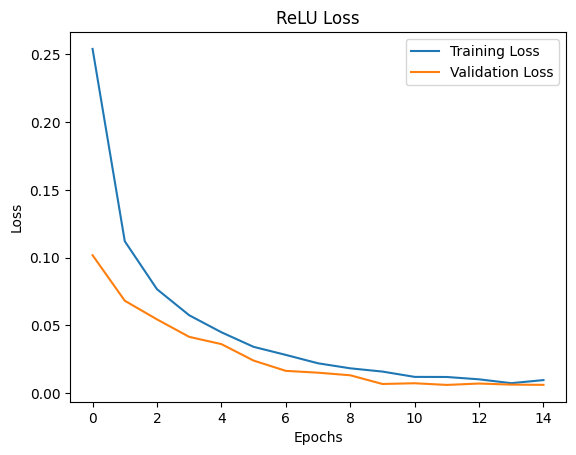

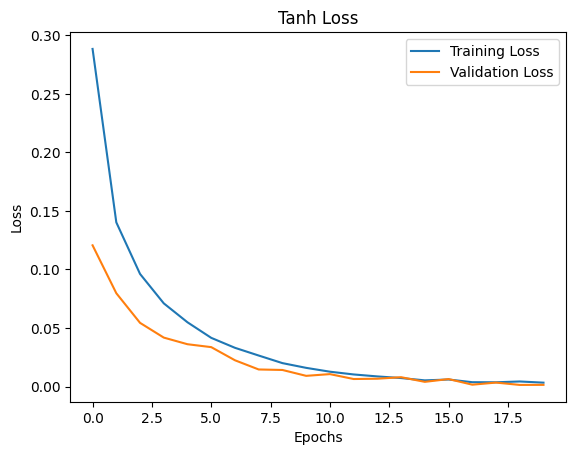

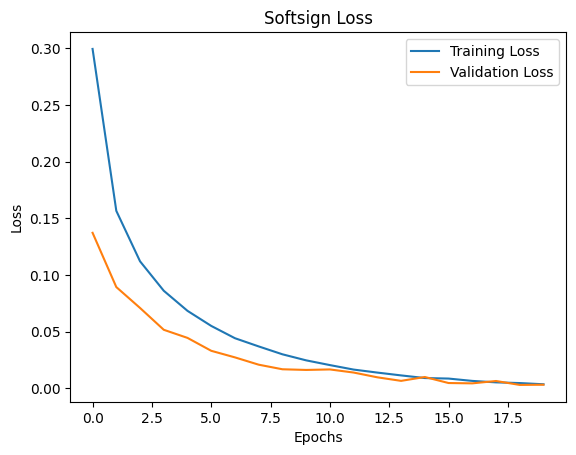

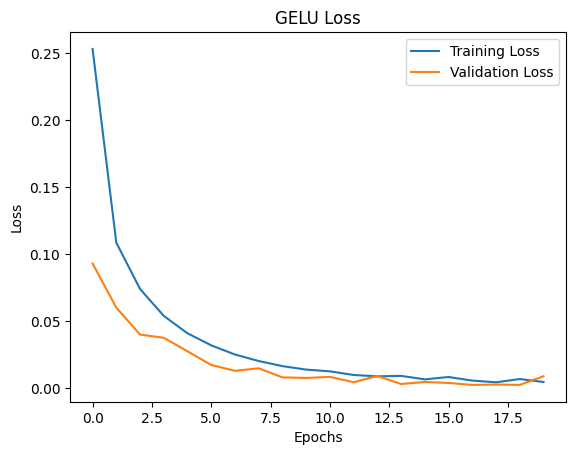

In [72]:
plot_loss(history_relu, "ReLU Loss")
plot_loss(history_tanh, "Tanh Loss")
plot_loss(history_soft, "Softsign Loss")
plot_loss(history_gelu, "GELU Loss")


## Apply Task 10

In [73]:
# Get weights and bias from the first Dense layer
w, b = model.layers[1].get_weights()

# Print shapes
print("Weights shape:", w.shape)
print("Bias shape:", b.shape)


Weights shape: (784, 128)
Bias shape: (128,)


In [74]:
# 7) Evaluate on Test Set
print("Final evaluation on test data:")
model.evaluate(x_test, y_test)

Final evaluation on test data:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9794 - loss: 0.0740


[0.0622602179646492, 0.9830999970436096]

In [75]:
# 8) Predict Example
sample = x_test[13].reshape(1, 28, 28)
pred = model.predict(sample)
print("Predicted Label:", np.argmax(pred))
print("True Label:", y_test[13])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted Label: 0
True Label: 0


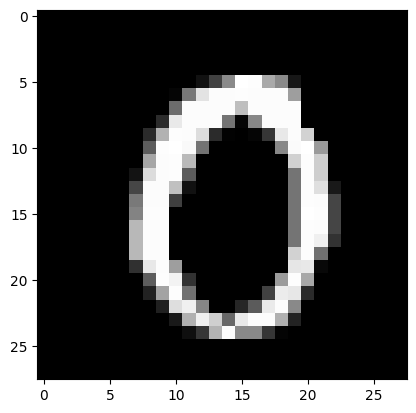

In [76]:
plt.imshow(x_test[13], cmap="gray")
plt.show()

## Section 3 — Student Tasks: Deep Learning Mastery

This section turns theory and practice into structured exploration. Students investigate predictions, optimization behavior, regularization strength, and architectural effects.
### **Task Categories:**

#### **1. Prediction Behavior & Analysis**
- Explain correct and incorrect predictions
- Connect outputs to internal neural network operations

#### **2. Training Dynamics & Loss Curves**
- Compare different epoch lengths
- Interpret overfitting and underfitting signals

#### **3. Regularization Experiments**
- Dropout ablation (0%, 10%, 30%)
- L2 weight decay tuning
- EarlyStopping behavior interpretation

#### **4. Optimizer Comparison**
- SGD
- SGD with Momentum
- Adam
- AdamW
Students analyze convergence speed, stability, and gradients.

#### **5. Architecture & Activation Function Variants**
- Replace ReLU with Tanh, Softsign, or GELU
- Discuss gradient flow differences
- Explain why ReLU dominates MLPs and why GELU is favored in Transformers

#### **6. Weight Inspection & Model Capacity**
- Examine dense layer weights
- Connect parameter count to overfitting risk
- Explain how regularization mitigates capacity issues


---

## Part 1 — Core Model Understanding & Prediction Behavior

### **Task 1 — Deep Prediction Analysis**
Select **three samples** from `x_test` and:

1. Run `model.predict(...)` on each sample.  
2. Print the **Predicted Label** and **True Label**.  
3. Provide a conceptual explanation of the result by referencing:
   - How the forward pass transforms inputs through layers.  
   - The role of activation functions (ReLU, Softmax).  
   - How the optimizer (Adam) may have shaped weight updates during training.

The objective is not to simply report results, but to analyze *why* the model predicted correctly or incorrectly.

---

### **Task 2 — Custom Image Generalization Test**
Create a handwritten digit using a drawing tool and load it into the model. After preprocessing (grayscale, resizing to 28×28, normalization), run prediction and analyze:

- Did the model correctly classify the digit?  
- If not, why? Consider distribution shift, noise, or lack of augmentation.  
- How does this relate to representation learning in neural networks?

---

### **Task 3 — Epoch-Based Learning Curve Exploration**
Train the model with:
- 5 epochs  
- 10 epochs  
- 20 epochs

For each run:
1. Plot **loss vs. val_loss** and **accuracy vs. val_accuracy**.  
2. Identify signs of overfitting.  
3. Explain how the optimizer (Adam) influenced the speed and stability of convergence.

The focus is on understanding training dynamics.

---

### **Task 4 — EarlyStopping Behavior Analysis**
Enable EarlyStopping with:
```python
keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
```
Analyze:

1. At which epoch did training stop?  
2. Why does the validation loss control this decision?  
3. What happens if you increase patience (e.g., to 5)?  
4. Would a different optimizer (e.g., SGD) change the EarlyStopping pattern?  
5. Explain how EarlyStopping acts as an indirect form of regularization.

---


---

## Part 2 — Regularization & Optimization Mastery

### **Task 5 — Dropout Ablation Study**
Modify the model to test three configurations:
- No Dropout  
- Dropout = 0.1  
- Dropout = 0.3

For each configuration:
1. Train the model.  
2. Plot training vs. validation loss.  
3. Compare overfitting levels.  
4. Explain how Dropout encourages robust representations by preventing neuron co-adaptation.

---

### **Task 6 — L2 Regularization Experiment**
Add L2 regularization:
```python
kernel_regularizer=keras.regularizers.l2(0.001)
```
Test values:
- 0.0001  
- 0.001  
- 0.01

Analyze:
- How L2 reduces weight magnitude.  
- Why smaller weights often improve generalization.  
- How L2 changes the validation loss trend.

---

### **Task 7 — Optimizer Comparison Challenge**
Train four models using identical architecture but different optimizers:
- SGD (learning_rate=0.01)  
- SGD with Momentum  
- Adam  
- AdamW

For each optimizer:
1. Plot loss and accuracy curves.  
2. Compare convergence speed and stability.  
3. Discuss how each optimizer navigates the loss landscape differently.  
4. Explain why Adam often outperforms classical optimizers.

---

### **Task 8 — Batch Size & Gradient Noise Experiment**
Train the model with batch sizes:
- 8  
- 32  
- 128

Discuss:
- Why smaller batches introduce gradient noise.  
- When this noise is beneficial (escaping local minima).  
- Why larger batches may converge faster but generalize worse.  
- How batch size affects the smoothness of loss curves.

---

### **Task 9 — Activation Function Swap (ReLU vs Tanh vs GELU)**
Modify the model by replacing ReLU with:
- Tanh  
- Softsign  
- GELU

Analyze:
- How each activation affects gradient flow.  
- Which activations risk vanishing gradients.  
- Why GELU performs well in Transformer architectures.  
- Why ReLU remains preferred for many MLP and CNN models.

---

### **Task 10 — Weight Inspection & Model Capacity Analysis**
Extract weights from the first Dense layer:
```python
w, b = model.layers[1].get_weights()
print(w.shape)
```
Reflect on:
- Why the number of parameters is so large.  
- How high model capacity increases overfitting risk.  
- How techniques like Dropout, L2, and EarlyStopping each mitigate this risk differently.

---


This full task set is designed to build a deep understanding of neural networks, optimization, and regularization—bridging theory with hands-on experimentation in a structured, progress

---

---

---
# Submission Guide

This guide explains **exactly how you must submit your work on GitHub** for the Deep Learning & Neural Networks notebook. It is short, clear, and professional.

---

## 1. What You Must Submit
Upload the following to your GitHub repository:

```
notebook.ipynb          # Your completed notebook
submission/             # Your task answers (as Markdown files)
results/                # Plots, prediction images, optimizer curves
README.md               # Your project overview
```

Make sure all code runs **without errors**.

---

## 2. Repository Structure (Required)
```
project/
├── notebook.ipynb
├── README.md
├── results/
│   ├── predictions/
│   ├── loss_curves/
│   └── optimizer_tests/
└── submission/
    ├── Task01_PredictionAnalysis.md
    ├── Task02_CustomDigit.md
    ├── Task03_Epochs.md
    ├── Task04_EarlyStopping.md
    ├── Task05_Dropout.md
    ├── Task06_L2.md
    ├── Task07_Optimizers.md
    ├── Task08_BatchSize.md
    ├── Task09_Activations.md
    └── Task10_Weights.md
```

---

## 3. How to Write Each Task (Simple Template)
Each task must follow this format:

### **Task Title**
Example: *Task 01 — Prediction Analysis*

### **1. Objective**
One or two sentences explaining the goal.

### **2. Code Used**
Short snippet showing what you ran.

### **3. Results**
- Prediction output
- Plots or curves (if required)

### **4. Short Analysis**
Explain **why** the model behaved this way.
Mention concepts like:
- activations
- optimizer behavior
- overfitting / generalization
- regularization effects

### **5. Key Takeaway**
One clear sentence showing what you learned.

---

## 4. README Checklist
Your `README.md` must include:
- Project overview
- Short description of the three notebook sections
- How to run the notebook
- Samples of results (images/plots)

Keep it brief and clean.

---

## Final Notes
To receive full credit:
- Your repo must be **organized**, **clear**, and **professional**.
- All results and plots must be saved inside the `results/` folder.
- Each task must be written using the short template above.
- Your notebook must run from top to bottom with no errors.

Good luck, and make your GitHub submission shine!